In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import collections

In [2]:
ps = PorterStemmer()

In [3]:
train = pd.read_csv("data/share_repurchase_paragraphs.csv")

In [4]:
def relevant_sentence_from_text(df):
    relevant_sentence = list()
    irrelevant_sentences = list()
    for ind, para in enumerate(df.paragraph_text):
        
        row_text = df.text[ind]
        #print("row_text: ", row_text)
                    
        int_rdv = int(df.reported_data_value[ind])
        if (df.reported_data_value[ind] == int_rdv) & (len(str(int_rdv)) <= 3):
            row_data_val = str(int_rdv)
        elif (df.reported_data_value[ind] != int_rdv) & (len(str(int_rdv)) <= 3):
            row_data_val = str(df.reported_data_value[ind])[:-1]
        else:
            row_data_val = ""
            
        #print("row_data_val: ", row_data_val)
                    
        if df.reported_units[ind] != "ones":
            row_unit = df.reported_units[ind][:-1]
        else:
            row_unit = ""
            
        #print("row_unit: ", row_unit)
        
        para_sent_tokens = sent_tokenize(para)
        rel_sents = list()
        irrel_sents = list()
        for sent in para_sent_tokens:
            
            #print(ind)
                    
            if (row_text in sent) & (("$"+row_data_val in sent)|(" "+row_data_val+" " in sent)) & (row_unit in sent):
                rel_sents.append(sent)
                #print("yes")
            else:
                irrel_sents.append(sent)
                #print("no")
        relevant_sentence.append(rel_sents)
        irrelevant_sentences.append(irrel_sents)
    #else:
    #    relevant_sentence.append(["MISSING!"])
    #    irrelevant_sentences.append(["MISSING!"])
    
    df["irrelevant_sentences"] = irrelevant_sentences
    
    new_df = list()
    sents = list()
    for ind, sent_list in enumerate(relevant_sentence):
        for sent in sent_list:
            new_df.append(df.iloc[ind])
            sents.append(sent)
    
    df_sents = pd.DataFrame(new_df)
    df_sents["relevant_sentence"] = sents
    
    return(df_sents)

In [5]:
train_split = relevant_sentence_from_text(train)

In [6]:
train_split

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text,irrelevant_sentences,relevant_sentence
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.00,ones,"On May 28, 2015 we announced that our board ...",[The 2015 share repurchase program authorizes ...,"On May 28, 2015 we announced that our board ..."
1,A,0001090872-17-000018,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1140000000,1.14,billions,"On May 28, 2015 we announced that our board ...","[On May 28, 2015 we announced that our board ...",The 2015 share repurchase program authorizes t...
2,A,0001090872-17-000018,Share Repurchase Intention,remaining authorization to repurchase up to,610000000,610.00,millions,"Table of Contents 2016, upon the completion ...","[Table of Contents 2016, upon the completion...","As of October 31, 2017, we had remaining a..."
4,A,0001090872-17-000018,Amount Spent on Share Repurchases,repurchased,194000000,194.00,millions,"Table of Contents 2016, upon the completion ...","[Table of Contents 2016, upon the completion...","During the year ended October 31, 2017 ..."
5,AAL,0000006201-18-000009,Share Repurchase Authorization Date,July 2014,20140715,20100000.00,ones,4. Share Repurchase Programs and Dividends S...,"[4., As of December 31, 2017, $450 million re...",Share Repurchase Programs and Dividends Sinc...
6,AAL,0000006201-18-000009,Share Repurchase Authorization,share repurchase programs aggregating,11000000000,11.00,billions,4. Share Repurchase Programs and Dividends S...,"[4., As of December 31, 2017, $450 million re...",Share Repurchase Programs and Dividends Sinc...
7,AAL,0000006201-18-000009,Share Repurchase Intention,remained unused under a repurchase program,450000000,450.00,millions,4. Share Repurchase Programs and Dividends S...,"[4., Share Repurchase Programs and Dividends ...","As of December 31, 2017, $450 million remaine..."
9,AAL,0000006201-18-000009,Amount Spent on Share Repurchases,repurchased,1600000000,1.60,billions,"During the year ended December 31, 2017, we ...","[During the year ended December 31, 2016, ...","During the year ended December 31, 2017, we ..."
10,AAP,0001158449-18-000039,Share Repurchase Intention,remaining under its stock repurchase program a...,415100000,415.10,millions,The Company's stock repurchase program allows ...,[The Company's stock repurchase program allows...,The Company had $415.1 million remaining und...
11,AAP,0001158449-18-000039,Share Repurchase Count,repurchased,57000,57.00,thousands,The Company repurchased 57 thousand and 116 th...,[],The Company repurchased 57 thousand and 116 th...


In [7]:
categories = train_split.data_key_friendly_name.unique()

sub_df_list = list(range(len(categories)))
for ind, category in enumerate(categories):
    sub_df_list[ind] = train_split[train_split["data_key_friendly_name"] == category]
    
[date, auth, intent, count, amount, util, unk] = sub_df_list

In [8]:
unk.head()

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text,irrelevant_sentences,relevant_sentence
55,ADP,0000008670-17-000010,Unknown Share Repurchase Data,August 2015,25000000,25.0,millions,Date of Approval Shares August 2014 ...,[],Date of Approval Shares August 2014 ...
105,ALB,0000915913-18-000005,Unknown Share Repurchase Data,repurchase up to a maximum of,15000000,15.0,millions,"In November 2016, our Board of Directors autho...",[],"In November 2016, our Board of Directors autho..."
269,BDX,0000010795-17-000021,Unknown Share Repurchase Data,authorized,10000000,10.0,millions,Represents shares available under the repurcha...,[],Represents shares available under the repurcha...
398,CINF,0000020286-18-000012,Unknown Share Repurchase Data,shares were authorized,15000000,15.0,millions,We did not sell any of our shares that were no...,[We did not sell any of our shares that were n...,"On January 26, 2018, an additional 15 millio..."
427,CNC,0001071739-18-000030,Unknown Share Repurchase Data,The Company's Board of Directors has authorize...,8000000,8000.0,thousands,The Company's Board of Directors has authorize...,[],The Company's Board of Directors has authorize...


In [9]:
for df in [date, auth, intent, count, amount, util, unk]:
    df.reset_index(drop = True, inplace = True)

relevant_sentence = list()
irrelevant_sentences = list()
for ind, para in enumerate(train.paragraph_text):
    if train.text[ind] in train.paragraph_text[ind]:
        para_sent_tokens = sent_tokenize(para)
        rel_sents = list()
        irrel_sents = list()
        for sent in para_sent_tokens:
            if train.text[ind] in sent:
                rel_sents.append(sent)
            else:
                irrel_sents.append(sent)
        relevant_sentence.append(rel_sents)
        irrelevant_sentences.append(irrel_sents)
    else:
        relevant_sentence.append("MISSING!")
        irrelevant_sentences.append("MISSING!")

train["irrelevant_sentences"] = irrelevant_sentences

new_df = list()
sents = list()
for ind, sent_list in enumerate(relevant_sentence):
    for sent in sent_list:
        new_df.append(train.iloc[ind])
        sents.append(sent)

train_sents = pd.DataFrame(new_df)
train_sents["relevant_sentence"] = sents

train_sents.head()

for row in train.iterrows():
    row_vals = row[1][0]
    
    row_text = row_vals[3]
    
    int_rdv = int(row_vals[5])
    if (row_vals[5] == int_rdv) & (len(str(int_rdv)) <= 3):
        row_data_val = int_rdv
    elif (row_vals[5] != int_rdv) & (len(str(int_rdv)) <= 3):
        row_data_val = row_vals[5]
    else:
        row_data_val = ""
    
    if row_vals[6] != "ones":
        row_unit = row_vals[6][:-1]
    
    print(row_text, row_data_val, row_unit)
    

# Now start to work create a logistic regression model

### Steps: TfidfVectorizer, chi2, LogisticRegression

Reference: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [97]:
date.head()

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text,irrelevant_sentences,relevant_sentence
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.0,ones,"On May 28, 2015 we announced that our board ...",[The 2015 share repurchase program authorizes ...,"On May 28, 2015 we announced that our board ..."
1,AAL,0000006201-18-000009,Share Repurchase Authorization Date,July 2014,20140715,20100000.0,ones,4. Share Repurchase Programs and Dividends S...,"[4., As of December 31, 2017, $450 million re...",Share Repurchase Programs and Dividends Sinc...
2,AAP,0001158449-18-000039,Share Repurchase Authorization Date,"May 14, 2012",20120514,20100000.0,ones,The Company's stock repurchase program allows ...,[The Company's stock repurchase program allows...,The Company's $500 million stock repurchase pr...
3,AAPL,0000320193-17-000070,Share Repurchase Authorization Date,May 2017,20170515,20200000.0,ones,"Share Repurchase Program In May 2017, the Co...",[The Company's share repurchase program does n...,"Share Repurchase Program In May 2017, the Co..."
4,ABBV,0001551152-18-000014,Share Repurchase Authorization Date,"February 15, 2018",20180215,20200000.0,ones,"On February 15, 2018, AbbVie announced that it...",[],"On February 15, 2018, AbbVie announced that it..."


In [107]:
date_relevant = date.relevant_sentence.tolist()

date_irrelevant = list()
for l in date.irrelevant_sentences:
    for s in l:
        date_irrelevant.append(s)
        
date_relevant = pd.DataFrame(date_relevant, columns = ["sentences"])

date_irrelevant = pd.DataFrame(date_irrelevant, columns = ["sentences"])

# 1 = yes, 0 = no

date_relevant["is_date"] = 1

date_irrelevant["is_date"] = 0

date_lr = pd.concat([date_relevant, date_irrelevant])

#print(date_lr.head(), date_lr.tail())

In [186]:
def category_df_for_lr(df):
    """Take in relevant and irrelevant sentences and create new dataframe to be used in logistic regression.
    Return dataframe"""
    relevant_sentences = df.relevant_sentence.tolist()
    
    irrelevant_sentences = list()
    for l in df.irrelevant_sentences:
        for s in l:
            irrelevant_sentences.append(s)
    
    relevant_df = pd.DataFrame(relevant_sentences, columns = ["sentences"])
    
    irrelevant_df = pd.DataFrame(irrelevant_sentences, columns = ["sentences"])
    
    # new column assigning if sentence is about category or not. 1 = yes, 0 = no
    
    relevant_df["in_category"] = 1
    
    irrelevant_df["in_category"] = 0
    
    df_lr = pd.concat([relevant_df, irrelevant_df])
    
    return(df_lr)

In [108]:
date_lr.head()
#date_lr.is_date.unique()

,sentences,is_date
0,"On May 28, 2015 we announced that our board ...",1
1,Share Repurchase Programs and Dividends Sinc...,1
2,The Company's $500 million stock repurchase pr...,1
3,"Share Repurchase Program In May 2017, the Co...",1
4,"On February 15, 2018, AbbVie announced that it...",1


Text(0.5,0,'$\\chi^2$')

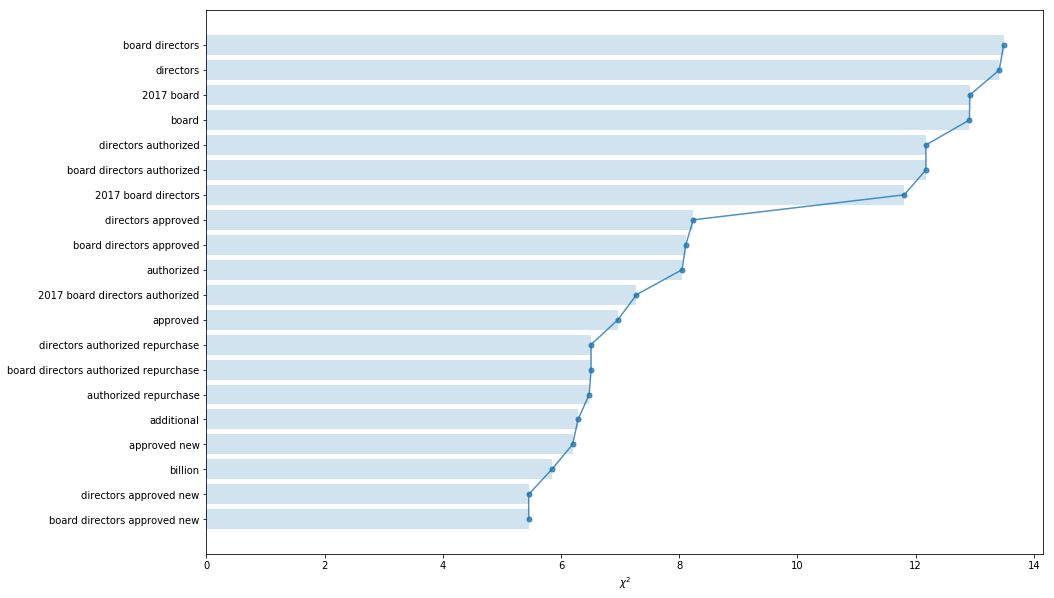

In [112]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        #min_df=5,
                        norm='l2',
                        #encoding='latin-1',
                        ngram_range=(1, 4),
                        stop_words='english')

X = date_lr.sentences
y = date_lr.is_date

X_tfidf = tfidf.fit_transform(X)

chi2score = chi2(X_tfidf, y)[0]

plt.figure(figsize=(15,10))
wscores = zip(tfidf.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$');

In [201]:
def make_predictions(df, ngram_range = (1, 4), cm = True):
    """Prepare text with TfidfVectorizer, 
    Select top features based on chi2, 
    and fit model using LogisticRegressionCV.
    Return score and predictions"""
    
    # initialize TfidfVectorizer, specifying certain hyperparameters
    tfidf = TfidfVectorizer(sublinear_tf = True, # use log to scale tf
                           norm = "l2", # norm method
                           ngram_range = ngram_range, # n-gram range to test (default is unigram to fourgram)
                           stop_words = "english") # language to use when removing stopwords
    
    # select input variables from dataframe 
    X = df.sentences 
    y = df.in_category
    
    # fit and transform text column
    X_tfidf = tfidf.fit_transform(X)
    
    # split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

    # select features to use for model
    ch2 = SelectKBest(chi2, k=100) # select top 100 features based on chi2
    
    # fit and transform training and test data using previously selected features
    X_train_chi2_selected = ch2.fit_transform(X_train, y_train)
    X_test_chi2_selected = ch2.transform(X_test)
    
    # initialize logistic regression
    lr = LogisticRegressionCV(cv = 5, penalty = "l2")
    
    # fit lr model to training data
    lr_model = lr.fit(X_train_chi2_selected, y_train)
    
    # use model to predict values for test data
    y_pred = lr_model.predict(X_test_chi2_selected)
    
    # score the model
    score = lr.score(X_test_chi2_selected, y_test)
    
    print("Score: ", score, "\n")
    
    if cm == True:
        # Count values for confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test.tolist(), y_pred).ravel()
        
        data = {'no': [tn, fp], 'yes': [fn, tp]}
        cm = pd.DataFrame.from_dict(data, orient='index',
                                    columns=["no", "yes"])
        print(cm)
    
    return(y_pred)

In [189]:
tn, fp, fn, tp = confusion_matrix(y_test.tolist(), y_pred).ravel()

In [200]:
data = {'no': [tn, fp], 'yes': [fn, tp]}
cm = pd.DataFrame.from_dict(data, orient='index',
                       columns=["no", "yes"])
cm

,no,yes
no,276,7
yes,94,32


In [120]:
wscores = zip(tfidf.get_feature_names(), chi2score)
len(sorted(wscores, key=lambda x:x[1], reverse = True))


29358

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

ch2 = SelectKBest(chi2, k=100) # select top 100 features based on chi2
X_train_chi2_selected = ch2.fit_transform(X_train, y_train)
X_test_chi2_selected = ch2.transform(X_test)
lr = LogisticRegressionCV(cv = 5, penalty = "l2")
lr_model = lr.fit(X_train_chi2_selected, y_train)
y_pred = lr_model.predict(X_test_chi2_selected)
score = lr.score(X_test_chi2_selected, y_test)
print(score)

0.8215158924205379


In [180]:
compare_df = pd.DataFrame(y_pred, columns = ["predicted"])
compare_df["actual"] = y_test.tolist()

In [181]:
type(y_test.tolist())

list

In [182]:
counter = 0
actual_wrong = list()
for row in compare_df.iterrows():
    if row[1]["predicted"] == row[1]["actual"]:
        counter += 1
    else:
        actual_wrong.append(row[1]["actual"])

In [184]:
print(compare_df.shape[0] - counter)
collections.Counter(actual_wrong)

73


Counter({0: 16, 1: 57})

In [185]:
X = tfidf.fit_transform(date_lr.sentences).toarray()
y = date_lr.is_date

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression()

date_model = lr.fit(X_train, y_train)

y_pred = date_model.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.7530562347188264


In [84]:
col = ['data_key_friendly_name', 'relevant_sentence']
df = train_split[col]
df = df[pd.notnull(df['relevant_sentence'])]
df.columns = ['dkfn', 'relevant_sentence']
df['category_id'] = df['dkfn'].factorize()[0]
category_id_df = df[['dkfn', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'dkfn']].values)

In [85]:
df.head(20)

,dkfn,relevant_sentence,category_id
0,Share Repurchase Authorization Date,"On May 28, 2015 we announced that our board ...",0
1,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1
2,Share Repurchase Intention,"As of October 31, 2017, we had remaining a...",2
4,Amount Spent on Share Repurchases,"During the year ended October 31, 2017 ...",3
5,Share Repurchase Authorization Date,Share Repurchase Programs and Dividends Sinc...,0
6,Share Repurchase Authorization,Share Repurchase Programs and Dividends Sinc...,1
7,Share Repurchase Intention,"As of December 31, 2017, $450 million remaine...",2
9,Amount Spent on Share Repurchases,"During the year ended December 31, 2017, we ...",3
10,Share Repurchase Intention,The Company had $415.1 million remaining und...,2
11,Share Repurchase Count,The Company repurchased 57 thousand and 116 th...,4


In [94]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        #min_df=5,
                        norm='l2',
                        #encoding='latin-1',
                        ngram_range=(3, 5),
                        stop_words='english')

features = tfidf.fit_transform(df.relevant_sentence).toarray()

labels = df.dkfn

features.shape

(1019, 35783)

In [96]:
N = 4
for dkfn, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    #unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    #bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    fourgrams = [v for v in feature_names if len(v.split(' ')) == 4]
    fivegrams = [v for v in feature_names if len(v.split(' ')) == 5]
    print("# '{}':".format(dkfn))
    #print("  Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    #print("  Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))
    print("  Most correlated fourgrams:\n. {}".format('\n. '.join(fourgrams[-N:])))
    print("  Most correlated fivegrams:\n. {}".format('\n. '.join(fivegrams[-N:])))

# 'Amount Spent on Share Repurchases':
  Most correlated trigrams:
. additional increases totaling
. additional month period
. additional paid capital
. additional program repurchase
  Most correlated fourgrams:
. additional million shares company
. additional million shares vms
. additional month period ending
. additional program repurchase billion
  Most correlated fivegrams:
. additional million shares company common
. additional month period ending september
. additional million shares vms common
. york stock exchange composite price
# 'Share Repurchase Authorization':
  Most correlated trigrams:
. additional increases totaling
. additional month period
. additional paid capital
. additional program repurchase
  Most correlated fourgrams:
. additional million shares company
. additional million shares vms
. additional month period ending
. additional program repurchase billion
  Most correlated fivegrams:
. additional million shares company common
. additional month period ending 

In [43]:
dkfn_factorize_df

,data_key_friendly_name,dkfn_factorize
0,Share Repurchase Authorization Date,0
1,Share Repurchase Authorization,1
2,Share Repurchase Intention,2
4,Amount Spent on Share Repurchases,3
11,Share Repurchase Count,4
16,Share Repurchase Utilization,5
55,Unknown Share Repurchase Data,6


In [44]:
dkfn_factorize_id

{'Share Repurchase Authorization Date': 0,
 'Share Repurchase Authorization': 1,
 'Share Repurchase Intention': 2,
 'Amount Spent on Share Repurchases': 3,
 'Share Repurchase Count': 4,
 'Share Repurchase Utilization': 5,
 'Unknown Share Repurchase Data': 6}

In [45]:
for dkfn, dkfn_factorize in sorted(dkfn_factorize_id.items()):
    features_chi2 = chi2(features, labels == dkfn_factorize)
    print(features_chi2)

(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))


In [33]:
N = 2
for dkfn, dkfn_factorize in sorted(dkfn_factorize_id.items()):
    features_chi2 = chi2(features, labels == dkfn_factorize)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    fourgrams = [v for v in feature_names if len(v.split(' ')) == 4]
    print("# '{}':".format(dkfn))
    print("  Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))
    print("  Most correlated fourgrams:\n. {}".format('\n. '.join(fourgrams[-N:])))

# 'Amount Spent on Share Repurchases':
  Most correlated unigrams:
. 856
. 855
  Most correlated bigrams:
. 851 929
. 86 118
  Most correlated trigrams:
. 855 322 003
. 851 929 31
  Most correlated fourgrams:
. 851 929 31 2017
. york stock exchange composite
# 'Share Repurchase Authorization':
  Most correlated unigrams:
. 856
. 855
  Most correlated bigrams:
. 851 929
. 86 118
  Most correlated trigrams:
. 855 322 003
. 851 929 31
  Most correlated fourgrams:
. 851 929 31 2017
. york stock exchange composite
# 'Share Repurchase Authorization Date':
  Most correlated unigrams:
. 856
. 855
  Most correlated bigrams:
. 851 929
. 86 118
  Most correlated trigrams:
. 855 322 003
. 851 929 31
  Most correlated fourgrams:
. 851 929 31 2017
. york stock exchange composite
# 'Share Repurchase Count':
  Most correlated unigrams:
. 856
. 855
  Most correlated bigrams:
. 851 929
. 86 118
  Most correlated trigrams:
. 855 322 003
. 851 929 31
  Most correlated fourgrams:
. 851 929 31 2017
. york s

In [17]:
for Product, category_id in sorted(train_split.items()):
    print(Product, category_id)

accession_number 0       0001090872-17-000018
1       0001090872-17-000018
2       0001090872-17-000018
4       0001090872-17-000018
5       0000006201-18-000009
6       0000006201-18-000009
7       0000006201-18-000009
9       0000006201-18-000009
10      0001158449-18-000039
11      0001158449-18-000039
12      0001158449-18-000039
13      0001158449-18-000039
14      0001158449-18-000039
15      0000320193-17-000070
16      0000320193-17-000070
17      0000320193-17-000070
18      0000320193-17-000070
19      0000320193-17-000070
20      0000320193-17-000070
21      0000320193-17-000070
22      0000320193-17-000070
23      0000320193-17-000070
25      0000320193-17-000070
26      0000320193-17-000070
27      0000320193-17-000070
28      0000320193-17-000070
29      0001551152-18-000014
31      0001551152-18-000014
32      0001551152-18-000014
33      0001140859-17-000047
                ...         
1730    0001365135-18-000013
1731    0000106535-18-000013
1733    0000106535-18-0000

In [63]:
lst = ["p1", "p2", "p3", "p4"]
tpl = tuple(["file_name"] + lst)
tpl

('file_name', 'p1', 'p2', 'p3', 'p4')

In [75]:
tpl_2 = ("file_name", lst)
tpl_2
type(tpl_2)

tuple

In [77]:
lst_1 = ["a", "b", "c"]
lst_2 = list("a" "b" "c")
print(lst_1, lst_2)

['a', 'b', 'c'] ['a', 'b', 'c']


In [78]:
print(type(lst_1))
print(type(lst_2))

<class 'list'>
<class 'list'>


In [79]:
tup_1 = ("a", "b")
tup_2 = tuple("a" "b")
print(tup_1, tup_2)
print(type(tup_1), type(tup_2))

('a', 'b') ('a', 'b')
<class 'tuple'> <class 'tuple'>


In [83]:
test  = tuple("a")
print(test)
type(test)

('a',)


tuple